In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [2]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import copy

In [3]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env
import utils.eligibility_optim as eligibility

# Setup

## Environment


In [6]:
env_name = 'Taxi-v2'

environment = env.Environment(
    environment=gym.make(env_name), 
    agent=None,
    verbose=True,
    max_steps=200,
    capacity=500,
    representation_method='one_hot_encoding',
)

/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


## Model

In [7]:
model_linear = linears.Linear(
    input_dimension=environment.get_input_dimension(), 
    n_actions=environment.n_actions,
)

model_mlp = mlps.MLP(
    input_dimension=environment.get_input_dimension(), 
    hidden_dimension=100,
    n_hidden_layers=1,
    n_actions=environment.n_actions,
    dropout=0.
)

model_rnn = rnns.RNN(
    input_dimension=environment.get_input_dimension(), 
    hidden_dimension=20,
    n_actions=environment.n_actions,
    dropout=0.,
    truncate=20
)

model_attentive_rnn = rnns.AttentiveRNN(
    input_dimension=environment.get_input_dimension(),
    hidden_dimension=20,
    key_dimension=10,
    n_actions=environment.n_actions,
    dropout=0.,
    horizon=-1,
    truncate=20
)

## Agent

In [11]:
model = model_mlp

agent = agents.DQNAgent(
    model=model,
    optimiser=eligibility.EligibilitySGD(model.parameters(), lr=1e-4, gamma=0.99, lambd=0.9), 
    gamma=.99, 
    temperature=3,
    algorithm='qlearning',
    n_actions=environment.n_actions,
    terminal_state=environment.max_obs,
    use_eligibility=True,
)

environment.agent = agent

Load an agent:

In [12]:
model.load_state_dict(torch.load('../saved/taxi/mlp/state_dict_saved.pth'))
agent.commit()
print(environment.agent.q(environment.state_representation(479)))

[-107.571175 -106.99925  -105.088844 -107.885025 -115.8059   -113.98003 ]


# Experiment

## Training

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/100


100%|###############################################################| 10/10 [00:20<00:00,  2.47s/it]


>> Training return : -791.21


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.70, steps : 200.00
>> Training loss : 30.62
Epoch 2/100


100%|###############################################################| 10/10 [00:33<00:00,  3.37s/it]


>> Training return : -781.02


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1364.15, steps : 200.00
>> Training loss : 30.37
Epoch 3/100


100%|###############################################################| 10/10 [00:37<00:00,  3.77s/it]


>> Training return : -770.21


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1184.15, steps : 200.00
>> Training loss : 31.25
Epoch 4/100


100%|###############################################################| 10/10 [00:32<00:00,  3.34s/it]


>> Training return : -759.12


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1275.50, steps : 200.00
>> Training loss : 28.48
Epoch 5/100


100%|###############################################################| 10/10 [00:36<00:00,  3.75s/it]


>> Training return : -767.59


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1007.30, steps : 200.00
>> Training loss : 32.68
Epoch 6/100


100%|###############################################################| 10/10 [00:37<00:00,  3.72s/it]


>> Training return : -786.36


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1361.90, steps : 200.00
>> Training loss : 35.24
Epoch 7/100


100%|###############################################################| 10/10 [00:38<00:00,  3.91s/it]


>> Training return : -777.14


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1544.15, steps : 200.00
>> Training loss : 35.24
Epoch 8/100


100%|###############################################################| 10/10 [00:37<00:00,  3.72s/it]


>> Training return : -756.12


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1096.85, steps : 200.00
>> Training loss : 37.39
Epoch 9/100


100%|###############################################################| 10/10 [00:40<00:00,  4.13s/it]


>> Training return : -770.17


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -916.85, steps : 200.00
>> Training loss : 36.48
Epoch 10/100


100%|###############################################################| 10/10 [00:40<00:00,  4.11s/it]


>> Training return : -772.17
>> Evaluation return : -1095.50, steps : 200.00
>> Training loss : 29.65


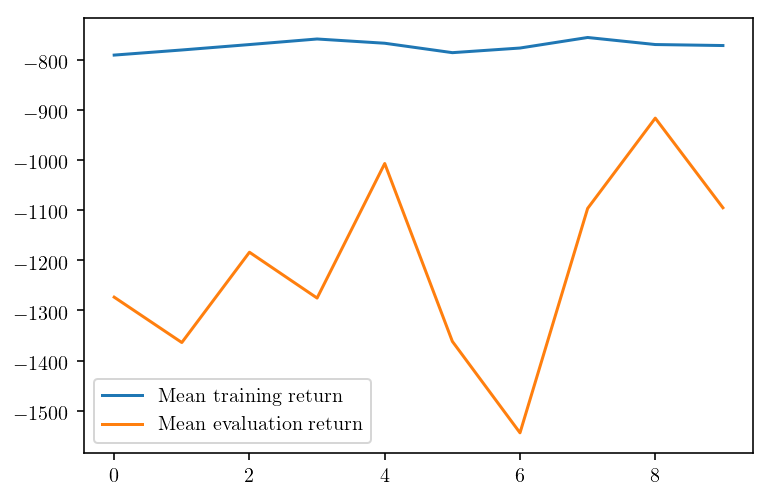

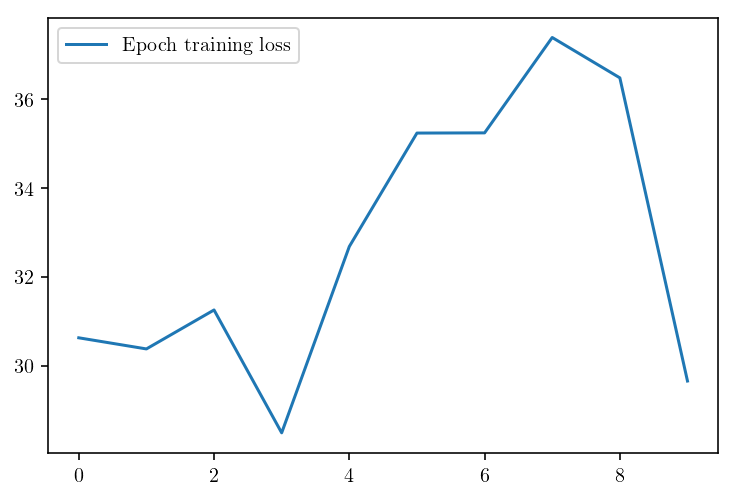

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 11/100


100%|###############################################################| 10/10 [00:40<00:00,  3.99s/it]


>> Training return : -769.50


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1096.40, steps : 200.00
>> Training loss : 30.56
Epoch 12/100


100%|###############################################################| 10/10 [00:39<00:00,  3.97s/it]


>> Training return : -780.40


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1272.80, steps : 200.00
>> Training loss : 30.71
Epoch 13/100


100%|###############################################################| 10/10 [00:35<00:00,  3.41s/it]


>> Training return : -766.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.40, steps : 200.00
>> Training loss : 31.14
Epoch 14/100


100%|###############################################################| 10/10 [00:33<00:00,  3.25s/it]


>> Training return : -777.95


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -915.95, steps : 200.00
>> Training loss : 31.38
Epoch 15/100


100%|###############################################################| 10/10 [00:32<00:00,  3.23s/it]


>> Training return : -775.16


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1275.95, steps : 200.00
>> Training loss : 30.81
Epoch 16/100


100%|###############################################################| 10/10 [00:32<00:00,  3.33s/it]


>> Training return : -784.62


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1187.30, steps : 200.00
>> Training loss : 30.26
Epoch 17/100


100%|###############################################################| 10/10 [00:32<00:00,  3.22s/it]


>> Training return : -766.03


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1186.40, steps : 200.00
>> Training loss : 30.21
Epoch 18/100


100%|###############################################################| 10/10 [00:33<00:00,  3.39s/it]


>> Training return : -765.20


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -919.55, steps : 200.00
>> Training loss : 30.42
Epoch 19/100


100%|###############################################################| 10/10 [00:32<00:00,  3.05s/it]


>> Training return : -772.42


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1184.60, steps : 200.00
>> Training loss : 29.65
Epoch 20/100


100%|###############################################################| 10/10 [00:22<00:00,  2.27s/it]


>> Training return : -767.79
>> Evaluation return : -1540.55, steps : 200.00
>> Training loss : 32.19


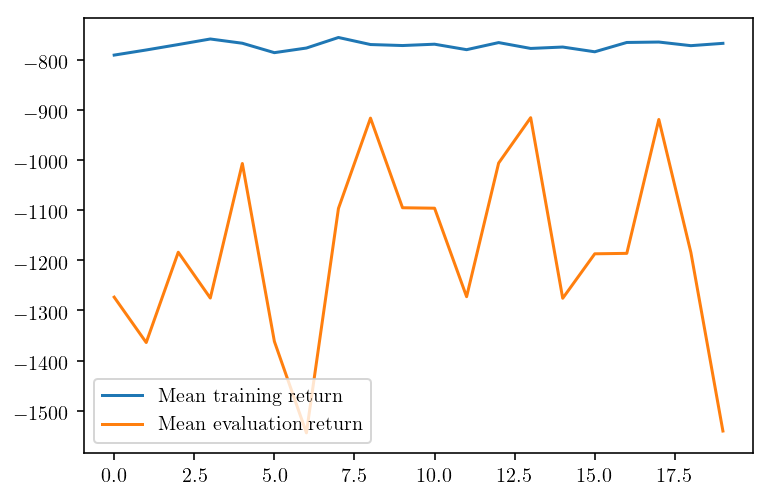

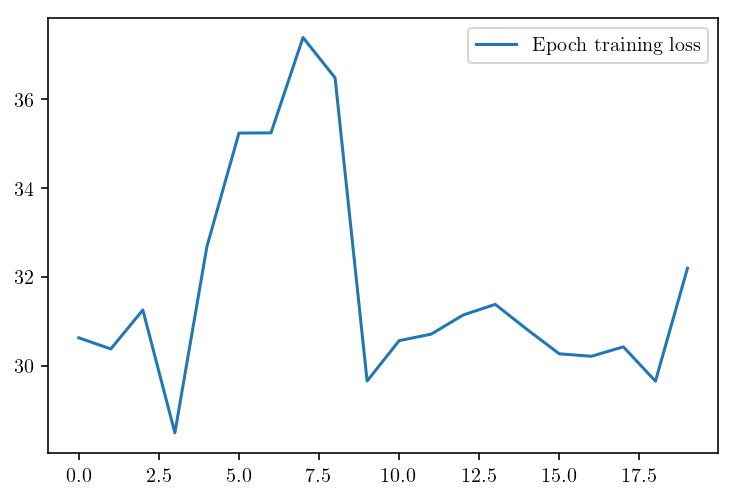

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 21/100


100%|###############################################################| 10/10 [00:23<00:00,  2.30s/it]


>> Training return : -774.27


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1275.05, steps : 200.00
>> Training loss : 30.24
Epoch 22/100


100%|###############################################################| 10/10 [00:19<00:00,  1.91s/it]


>> Training return : -756.33


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.70, steps : 200.00
>> Training loss : 32.15
Epoch 23/100


100%|###############################################################| 10/10 [00:18<00:00,  1.87s/it]


>> Training return : -755.62


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -916.40, steps : 200.00
>> Training loss : 33.30
Epoch 24/100


100%|###############################################################| 10/10 [00:19<00:00,  1.92s/it]


>> Training return : -767.87


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1626.50, steps : 200.00
>> Training loss : 32.10
Epoch 25/100


100%|###############################################################| 10/10 [00:18<00:00,  1.88s/it]


>> Training return : -770.85


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1454.15, steps : 200.00
>> Training loss : 34.25
Epoch 26/100


100%|###############################################################| 10/10 [00:19<00:00,  1.94s/it]


>> Training return : -748.13


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1365.05, steps : 200.00
>> Training loss : 32.57
Epoch 27/100


100%|###############################################################| 10/10 [00:32<00:00,  3.47s/it]


>> Training return : -780.74


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1365.50, steps : 200.00
>> Training loss : 33.47
Epoch 28/100


100%|###############################################################| 10/10 [00:41<00:00,  4.36s/it]


>> Training return : -772.08


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1453.70, steps : 200.00
>> Training loss : 32.58
Epoch 29/100


100%|###############################################################| 10/10 [00:40<00:00,  4.04s/it]


>> Training return : -771.41


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.85, steps : 200.00
>> Training loss : 31.99
Epoch 30/100


100%|###############################################################| 10/10 [00:38<00:00,  3.56s/it]


>> Training return : -757.79
>> Evaluation return : -1183.25, steps : 200.00
>> Training loss : 33.68


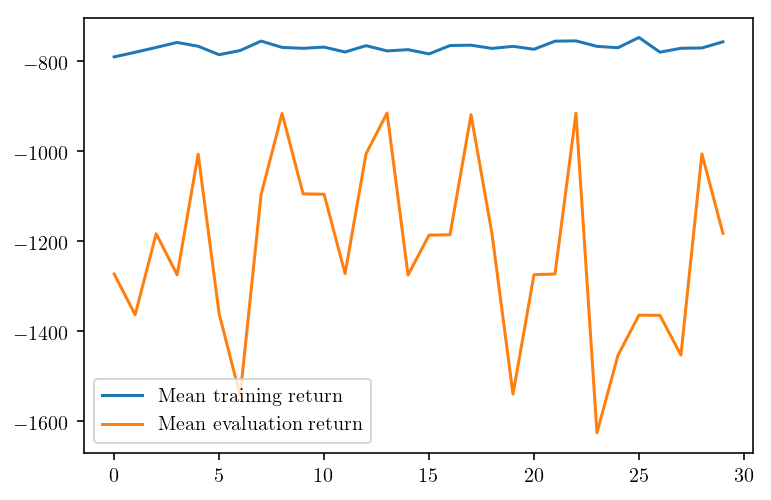

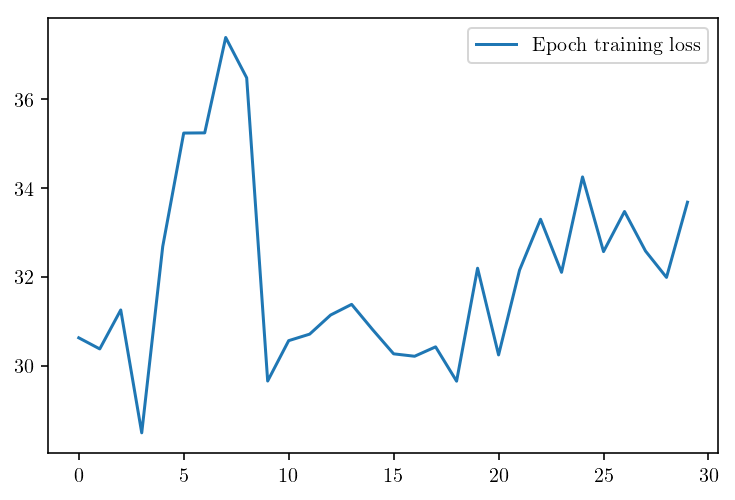

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 31/100


100%|###############################################################| 10/10 [00:28<00:00,  2.86s/it]


>> Training return : -776.35


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -917.30, steps : 200.00
>> Training loss : 31.37
Epoch 32/100


100%|###############################################################| 10/10 [00:28<00:00,  2.88s/it]


>> Training return : -788.19


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1096.85, steps : 200.00
>> Training loss : 30.74
Epoch 33/100


100%|###############################################################| 10/10 [00:27<00:00,  2.73s/it]


>> Training return : -772.49


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.70, steps : 200.00
>> Training loss : 30.69
Epoch 34/100


100%|###############################################################| 10/10 [00:28<00:00,  2.85s/it]


>> Training return : -770.83


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1186.40, steps : 200.00
>> Training loss : 30.12
Epoch 35/100


100%|###############################################################| 10/10 [00:30<00:00,  3.58s/it]


>> Training return : -764.12


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1183.25, steps : 200.00
>> Training loss : 29.60
Epoch 36/100


100%|###############################################################| 10/10 [00:55<00:00,  5.15s/it]


>> Training return : -769.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.70, steps : 200.00
>> Training loss : 29.85
Epoch 37/100


100%|###############################################################| 10/10 [00:52<00:00,  5.08s/it]


>> Training return : -767.21


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1093.70, steps : 200.00
>> Training loss : 30.69
Epoch 38/100


100%|###############################################################| 10/10 [00:41<00:00,  3.90s/it]


>> Training return : -776.87


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1543.25, steps : 200.00
>> Training loss : 31.84
Epoch 39/100


100%|###############################################################| 10/10 [00:21<00:00,  1.65s/it]


>> Training return : -756.86


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.25, steps : 200.00
>> Training loss : 30.56
Epoch 40/100


100%|###############################################################| 10/10 [00:14<00:00,  1.46s/it]


>> Training return : -768.84
>> Evaluation return : -1628.30, steps : 200.00
>> Training loss : 31.85


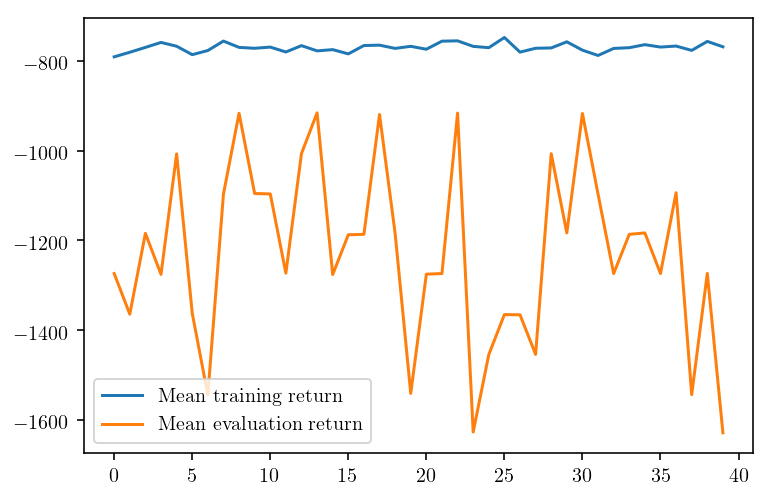

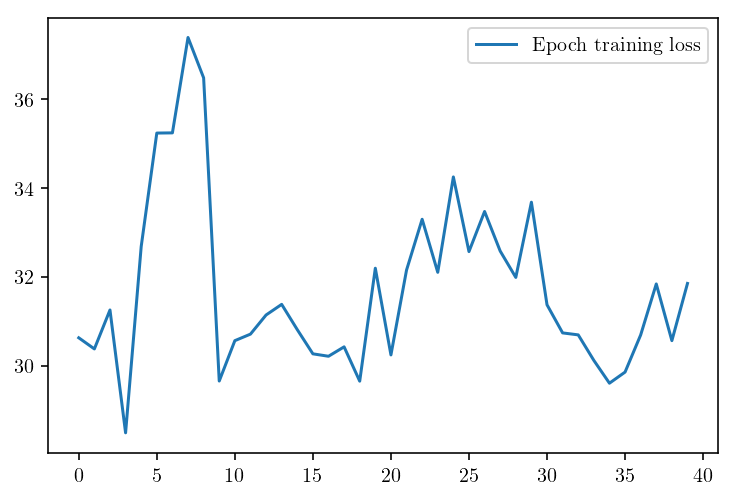

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 41/100


100%|###############################################################| 10/10 [00:14<00:00,  1.45s/it]


>> Training return : -778.48


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -915.05, steps : 200.00
>> Training loss : 34.43
Epoch 42/100


100%|###############################################################| 10/10 [00:14<00:00,  1.41s/it]


>> Training return : -780.09


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1364.15, steps : 200.00
>> Training loss : 35.14
Epoch 43/100


100%|###############################################################| 10/10 [00:14<00:00,  1.42s/it]


>> Training return : -782.04


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1453.25, steps : 200.00
>> Training loss : 35.29
Epoch 44/100


100%|###############################################################| 10/10 [00:20<00:00,  2.25s/it]


>> Training return : -746.01


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1007.75, steps : 200.00
>> Training loss : 32.67
Epoch 45/100


100%|###############################################################| 10/10 [00:23<00:00,  2.39s/it]


>> Training return : -789.21


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1276.40, steps : 200.00
>> Training loss : 32.77
Epoch 46/100


100%|###############################################################| 10/10 [00:23<00:00,  2.38s/it]


>> Training return : -776.42


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1094.15, steps : 200.00
>> Training loss : 33.53
Epoch 47/100


100%|###############################################################| 10/10 [00:33<00:00,  3.34s/it]


>> Training return : -786.29


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1451.00, steps : 200.00
>> Training loss : 35.49
Epoch 48/100


100%|###############################################################| 10/10 [00:34<00:00,  3.38s/it]


>> Training return : -771.47


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1182.80, steps : 200.00
>> Training loss : 34.31
Epoch 49/100


100%|###############################################################| 10/10 [00:32<00:00,  3.29s/it]


>> Training return : -751.94


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.85, steps : 200.00
>> Training loss : 32.59
Epoch 50/100


100%|###############################################################| 10/10 [00:31<00:00,  3.20s/it]


>> Training return : -764.63
>> Evaluation return : -829.10, steps : 200.00
>> Training loss : 32.25


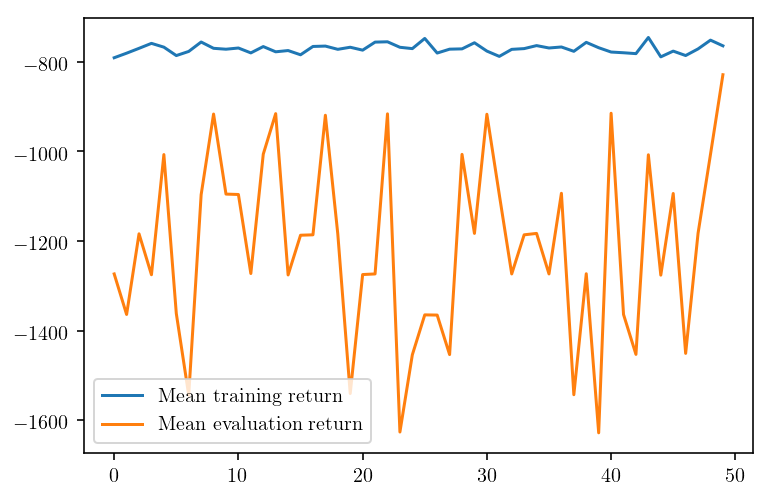

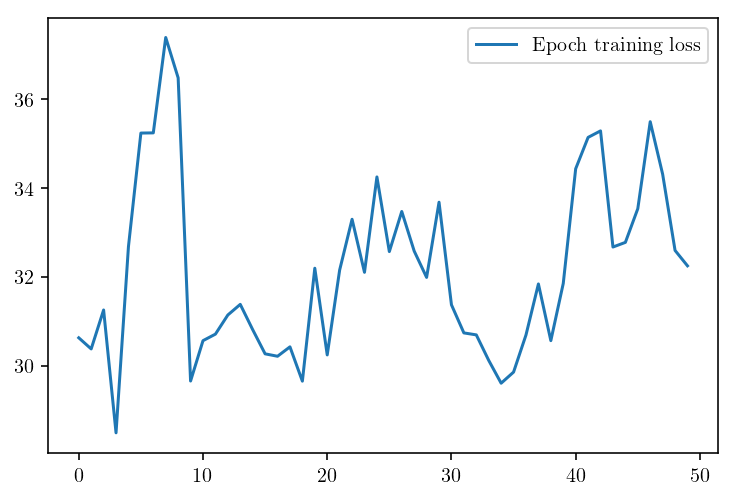

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 51/100


100%|###############################################################| 10/10 [00:31<00:00,  3.20s/it]


>> Training return : -784.84


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1542.35, steps : 200.00
>> Training loss : 32.85
Epoch 52/100


100%|###############################################################| 10/10 [00:32<00:00,  3.20s/it]


>> Training return : -759.20


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1093.25, steps : 200.00
>> Training loss : 33.30
Epoch 53/100


100%|###############################################################| 10/10 [00:35<00:00,  3.91s/it]


>> Training return : -764.29


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1185.95, steps : 200.00
>> Training loss : 33.81
Epoch 54/100


100%|###############################################################| 10/10 [00:38<00:00,  3.82s/it]


>> Training return : -786.72


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1366.40, steps : 200.00
>> Training loss : 35.60
Epoch 55/100


100%|###############################################################| 10/10 [00:37<00:00,  3.78s/it]


>> Training return : -766.75


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1453.70, steps : 200.00
>> Training loss : 37.68
Epoch 56/100


100%|###############################################################| 10/10 [00:34<00:00,  3.29s/it]


>> Training return : -751.83


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1363.25, steps : 200.00
>> Training loss : 32.05
Epoch 57/100


100%|###############################################################| 10/10 [00:29<00:00,  2.97s/it]


>> Training return : -764.20


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1361.00, steps : 200.00
>> Training loss : 34.73
Epoch 58/100


100%|###############################################################| 10/10 [00:29<00:00,  2.95s/it]


>> Training return : -780.32


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1361.90, steps : 200.00
>> Training loss : 34.44
Epoch 59/100


100%|###############################################################| 10/10 [00:29<00:00,  3.01s/it]


>> Training return : -772.62


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -741.35, steps : 200.00
>> Training loss : 34.32
Epoch 60/100


100%|###############################################################| 10/10 [00:30<00:00,  2.99s/it]


>> Training return : -755.58
>> Evaluation return : -1094.15, steps : 200.00
>> Training loss : 33.70


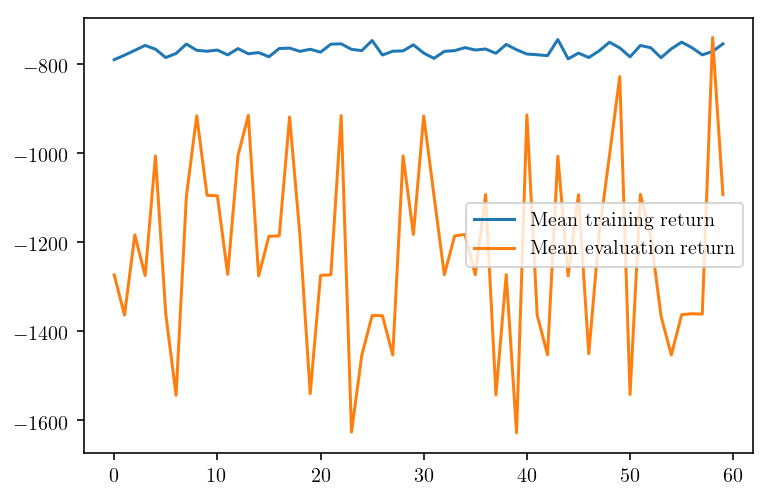

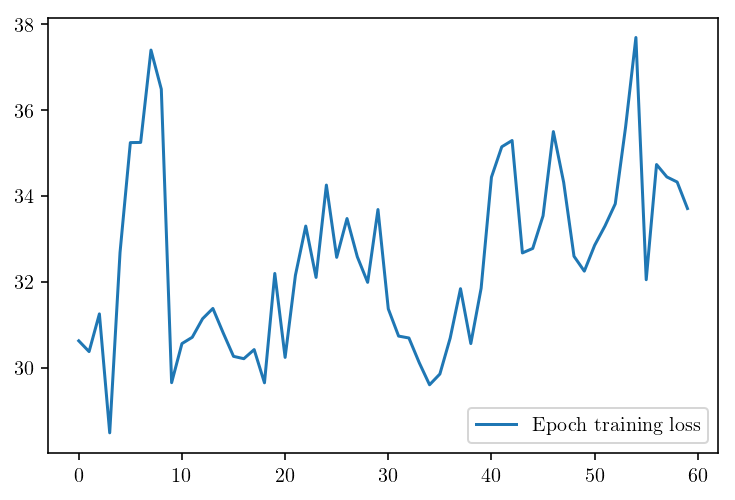

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 61/100


100%|###############################################################| 10/10 [00:31<00:00,  3.09s/it]


>> Training return : -781.32


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1454.15, steps : 200.00
>> Training loss : 31.79
Epoch 62/100


100%|###############################################################| 10/10 [00:31<00:00,  3.23s/it]


>> Training return : -753.97


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1450.10, steps : 200.00
>> Training loss : 35.88
Epoch 63/100


100%|###############################################################| 10/10 [00:26<00:00,  1.98s/it]


>> Training return : -757.30


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1363.70, steps : 200.00
>> Training loss : 36.20
Epoch 64/100


100%|###############################################################| 10/10 [00:14<00:00,  1.45s/it]


>> Training return : -770.80


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1183.25, steps : 200.00
>> Training loss : 33.72
Epoch 65/100


100%|###############################################################| 10/10 [00:13<00:00,  1.39s/it]


>> Training return : -768.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1182.80, steps : 200.00
>> Training loss : 32.30
Epoch 66/100


100%|###############################################################| 10/10 [00:14<00:00,  1.41s/it]


>> Training return : -780.25


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1096.85, steps : 200.00
>> Training loss : 32.85
Epoch 67/100


100%|###############################################################| 10/10 [00:13<00:00,  1.40s/it]


>> Training return : -776.58


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1275.95, steps : 200.00
>> Training loss : 34.82
Epoch 68/100


100%|###############################################################| 10/10 [00:18<00:00,  2.42s/it]


>> Training return : -789.36


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1451.00, steps : 200.00
>> Training loss : 33.42
Epoch 69/100


100%|###############################################################| 10/10 [00:32<00:00,  3.22s/it]


>> Training return : -771.18


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1273.70, steps : 200.00
>> Training loss : 31.14
Epoch 70/100


100%|###############################################################| 10/10 [00:30<00:00,  3.02s/it]


>> Training return : -749.53
>> Evaluation return : -1362.35, steps : 200.00
>> Training loss : 30.48


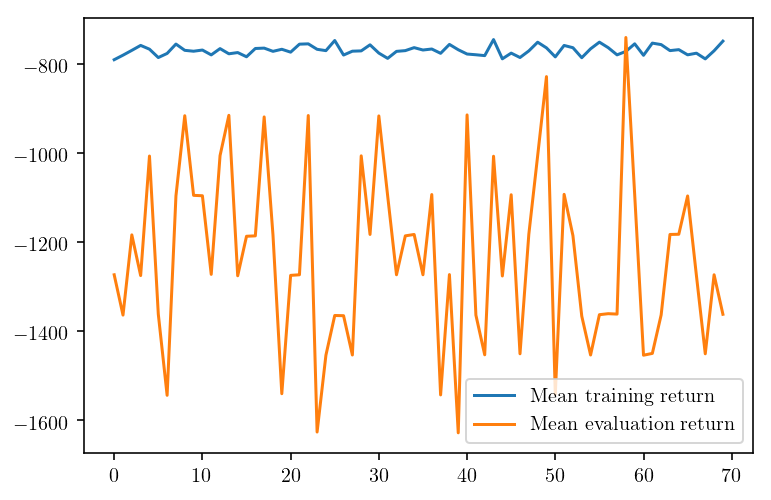

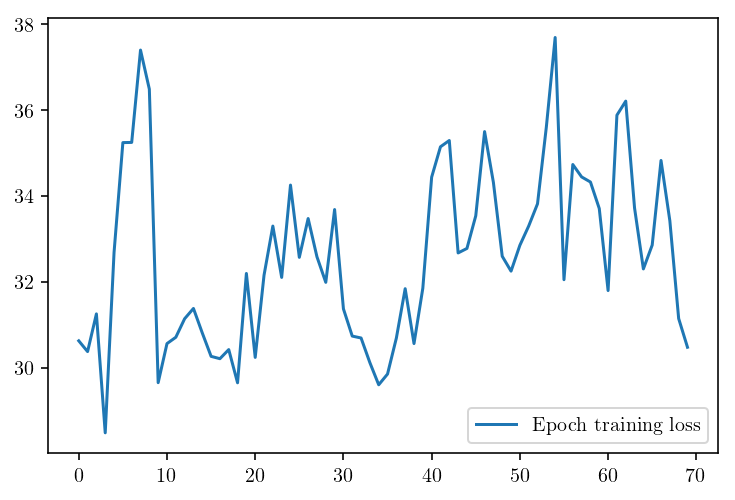

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 71/100


100%|###############################################################| 10/10 [00:30<00:00,  3.02s/it]


>> Training return : -777.36


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -827.30, steps : 200.00
>> Training loss : 31.97
Epoch 72/100


100%|###############################################################| 10/10 [00:29<00:00,  2.94s/it]


>> Training return : -758.67


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1365.05, steps : 200.00
>> Training loss : 31.27
Epoch 73/100


100%|###############################################################| 10/10 [00:30<00:00,  3.14s/it]


>> Training return : -775.07


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1092.80, steps : 200.00
>> Training loss : 31.69
Epoch 74/100


100%|###############################################################| 10/10 [00:32<00:00,  3.22s/it]


>> Training return : -756.62


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1186.40, steps : 200.00
>> Training loss : 33.28
Epoch 75/100


100%|###############################################################| 10/10 [00:31<00:00,  3.16s/it]


>> Training return : -798.16


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1094.15, steps : 200.00
>> Training loss : 34.61
Epoch 76/100


100%|###############################################################| 10/10 [00:31<00:00,  3.20s/it]


>> Training return : -785.22


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1185.05, steps : 200.00
>> Training loss : 35.37
Epoch 77/100


100%|###############################################################| 10/10 [00:38<00:00,  4.04s/it]


>> Training return : -757.93


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.85, steps : 200.00
>> Training loss : 34.20
Epoch 78/100


100%|###############################################################| 10/10 [00:38<00:00,  3.81s/it]


>> Training return : -781.48


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1092.35, steps : 200.00
>> Training loss : 33.70
Epoch 79/100


100%|###############################################################| 10/10 [00:39<00:00,  3.95s/it]


>> Training return : -776.02


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1272.35, steps : 200.00
>> Training loss : 34.38
Epoch 80/100


100%|###############################################################| 10/10 [00:33<00:00,  3.13s/it]


>> Training return : -761.38
>> Evaluation return : -1186.85, steps : 200.00
>> Training loss : 31.95


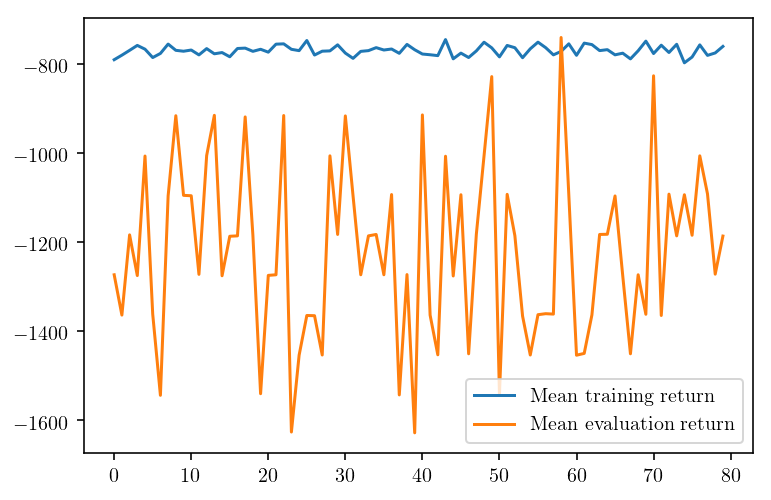

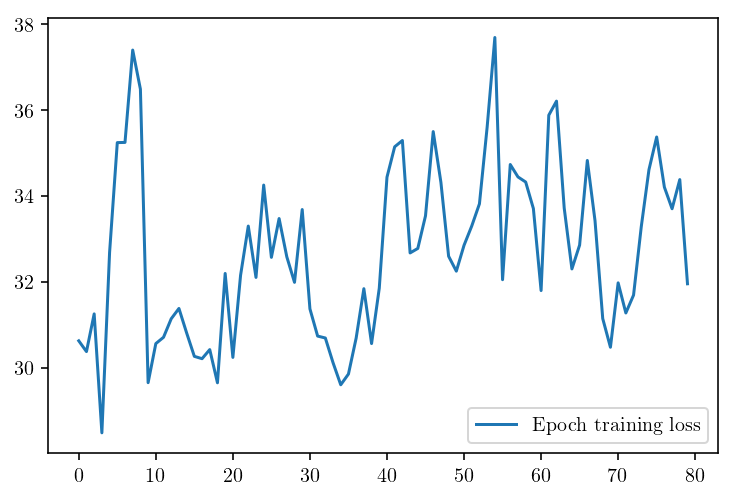

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 81/100


100%|###############################################################| 10/10 [00:30<00:00,  3.03s/it]


>> Training return : -780.38


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1274.15, steps : 200.00
>> Training loss : 31.60
Epoch 82/100


100%|###############################################################| 10/10 [00:29<00:00,  2.90s/it]


>> Training return : -763.91


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1452.35, steps : 200.00
>> Training loss : 31.99
Epoch 83/100


100%|###############################################################| 10/10 [00:29<00:00,  2.88s/it]


>> Training return : -771.67


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1096.85, steps : 200.00
>> Training loss : 31.98
Epoch 84/100


100%|###############################################################| 10/10 [00:28<00:00,  2.87s/it]


>> Training return : -761.30


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1452.80, steps : 200.00
>> Training loss : 32.64
Epoch 85/100


100%|###############################################################| 10/10 [00:34<00:00,  3.83s/it]


>> Training return : -780.84


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.40, steps : 200.00
>> Training loss : 30.49
Epoch 86/100


100%|###############################################################| 10/10 [00:37<00:00,  3.75s/it]


>> Training return : -779.71


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1455.05, steps : 200.00
>> Training loss : 31.12
Epoch 87/100


100%|###############################################################| 10/10 [00:37<00:00,  3.72s/it]


>> Training return : -771.98


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1452.35, steps : 200.00
>> Training loss : 29.94
Epoch 88/100


100%|###############################################################| 10/10 [00:37<00:00,  3.77s/it]


>> Training return : -781.35


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1093.25, steps : 200.00
>> Training loss : 31.88
Epoch 89/100


100%|###############################################################| 10/10 [00:37<00:00,  3.78s/it]


>> Training return : -779.82


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1455.05, steps : 200.00
>> Training loss : 29.69
Epoch 90/100


100%|###############################################################| 10/10 [00:39<00:00,  3.90s/it]


>> Training return : -772.29
>> Evaluation return : -1005.95, steps : 200.00
>> Training loss : 30.43


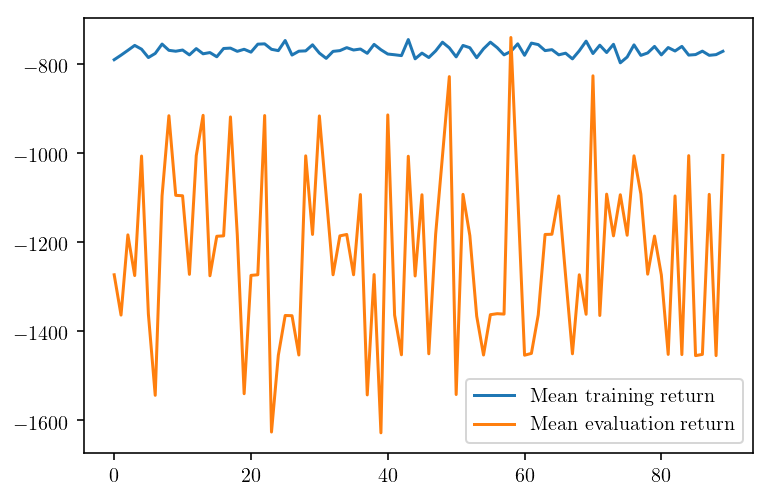

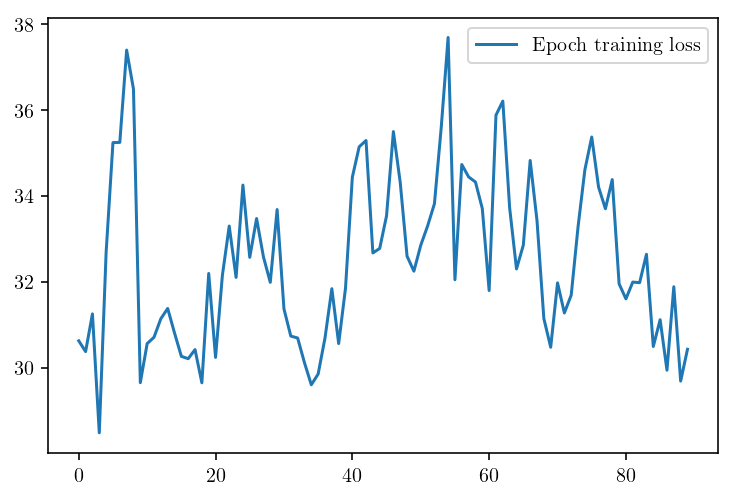

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 91/100


100%|###############################################################| 10/10 [00:38<00:00,  3.86s/it]


>> Training return : -773.93


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1094.60, steps : 200.00
>> Training loss : 31.07
Epoch 92/100


100%|###############################################################| 10/10 [00:36<00:00,  3.64s/it]


>> Training return : -759.54


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1184.60, steps : 200.00
>> Training loss : 32.35
Epoch 93/100


100%|###############################################################| 10/10 [00:33<00:00,  3.31s/it]


>> Training return : -764.50


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1187.75, steps : 200.00
>> Training loss : 32.46
Epoch 94/100


100%|###############################################################| 10/10 [00:34<00:00,  3.49s/it]


>> Training return : -778.89


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1541.90, steps : 200.00
>> Training loss : 32.13
Epoch 95/100


100%|###############################################################| 10/10 [00:34<00:00,  3.35s/it]


>> Training return : -779.27


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1006.40, steps : 200.00
>> Training loss : 30.30
Epoch 96/100


100%|###############################################################| 10/10 [00:33<00:00,  3.32s/it]


>> Training return : -786.55


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1095.50, steps : 200.00
>> Training loss : 28.06
Epoch 97/100


100%|###############################################################| 10/10 [00:33<00:00,  3.53s/it]


>> Training return : -769.77


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1095.95, steps : 200.00
>> Training loss : 27.90
Epoch 98/100


100%|###############################################################| 10/10 [00:29<00:00,  2.82s/it]


>> Training return : -765.71


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1185.05, steps : 200.00
>> Training loss : 30.31
Epoch 99/100


100%|###############################################################| 10/10 [00:28<00:00,  2.94s/it]


>> Training return : -781.26


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1005.95, steps : 200.00
>> Training loss : 31.44
Epoch 100/100


100%|###############################################################| 10/10 [00:22<00:00,  2.13s/it]


>> Training return : -761.40
>> Evaluation return : -1630.10, steps : 200.00
>> Training loss : 35.19


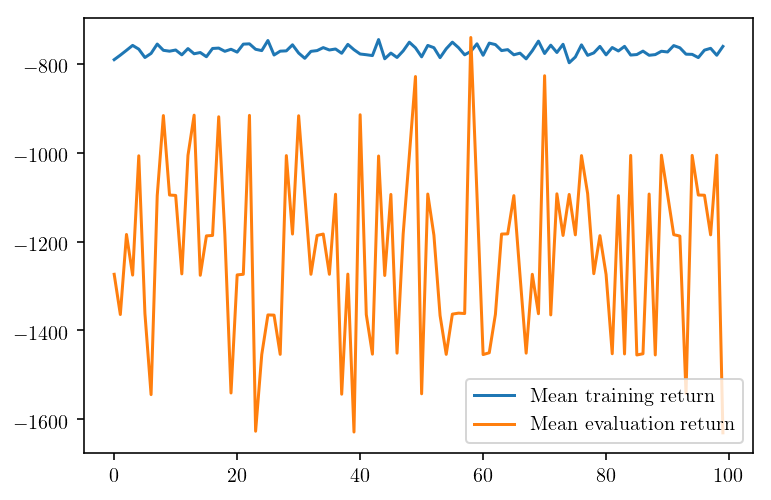

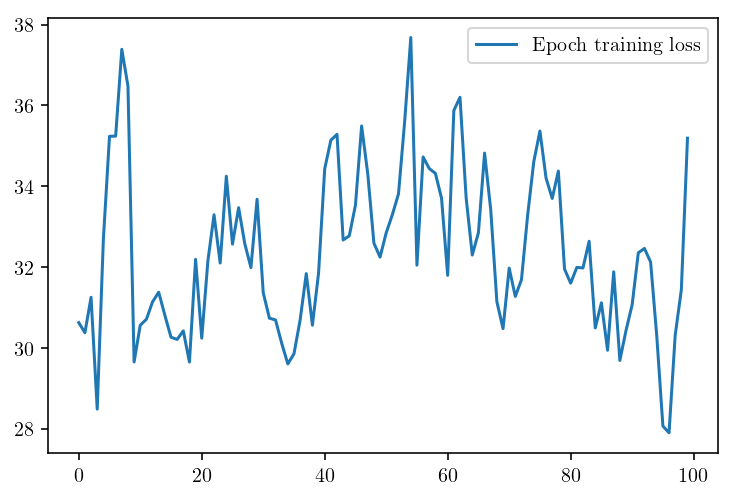

In [12]:
training, evaluation = environment.run(
    epochs=100,
    segments=10,
    episodes=10,
    wall_time=2,
    num_evaluation=20,
    batch_size=100,
    save_directory='../saved/final/mlp_eligibility',
    log_directory='final_taxi_mlp_eligibility',
    temp_decay = 1.,
    display_return_curve=True,
)